Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        80
           1       0.68      0.70      0.69        63

    accuracy                           0.72       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.72      0.72      0.72       143

Confusion Matrix:
[[59 21]
 [19 44]]


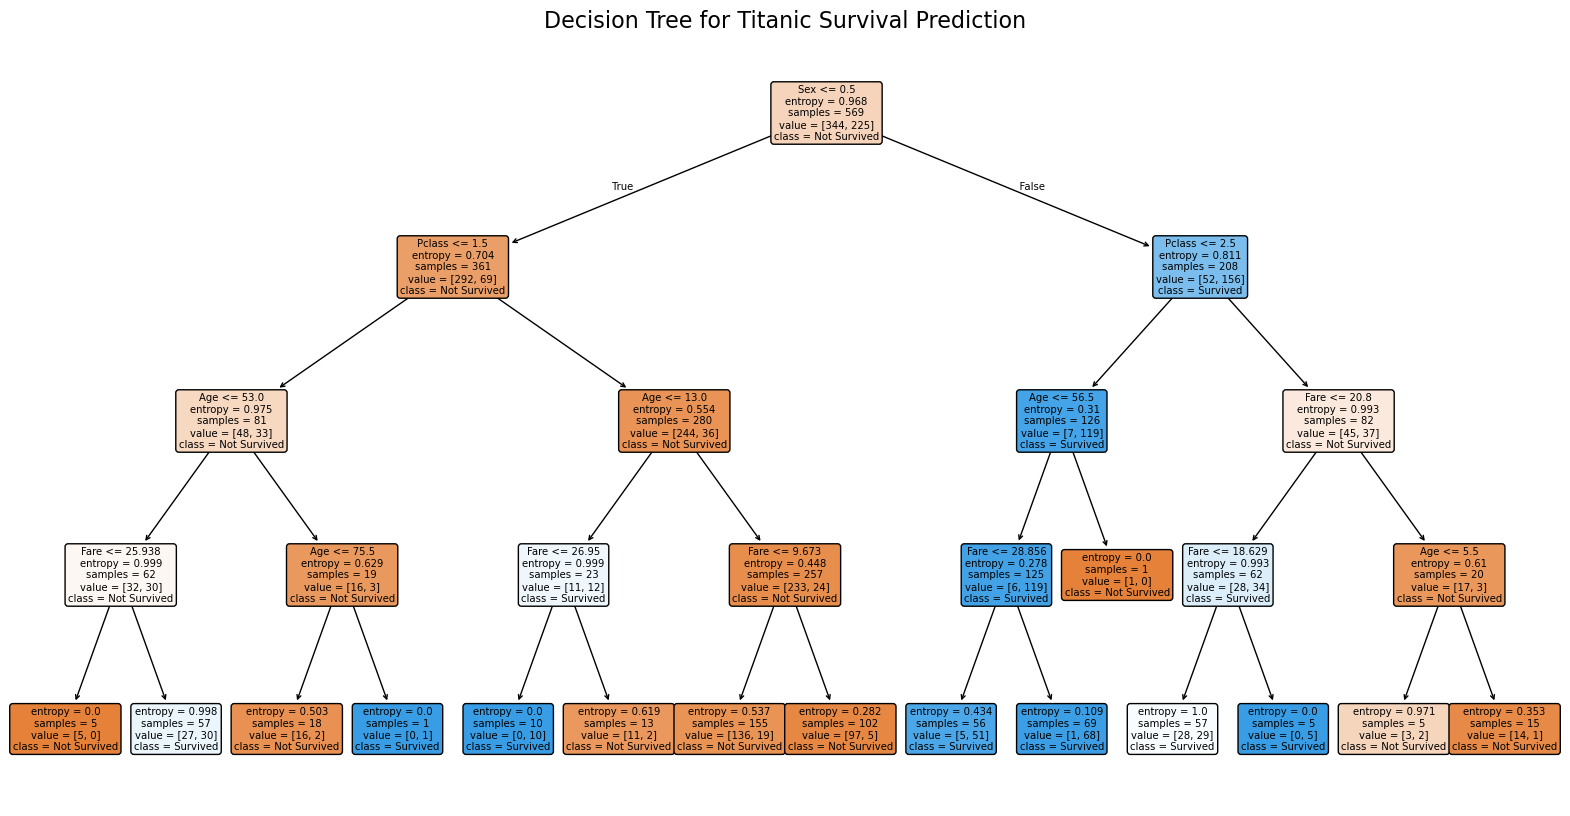

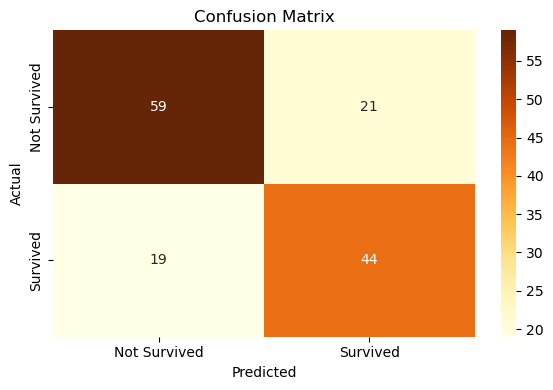

C:\Users\dell\AppData\Local\Temp\ipykernel_15996\921092974.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=X_features.columns, palette='Set3')  # Colorful, friendly palette


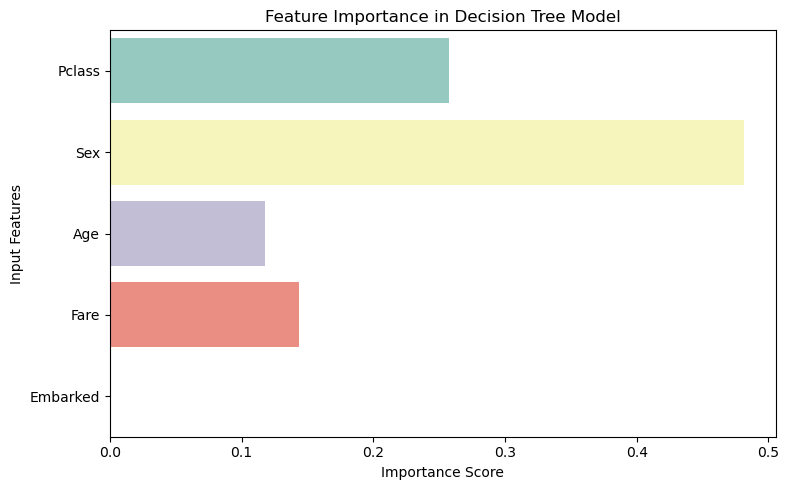

In [1]:
import pandas as pd       
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the Titanic dataset from CSV
titanic_data = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Titanic_data.csv")

# Step 2: Select useful features and clean the dataset
selected_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
clean_data = titanic_data[selected_features + ['Survived']].dropna()

# Step 3: Convert categorical variables to numeric codes
clean_data['Sex'] = clean_data['Sex'].map({'male': 0, 'female': 1})
clean_data['Embarked'] = clean_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Step 4: Separate the features (X) and the target variable (y)
X_features = clean_data.drop('Survived', axis=1)
y_target = clean_data['Survived']

# Step 5: Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42
)

# Step 6: Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy',
    random_state=42
)
decision_tree_model.fit(X_train, y_train)

# Step 7: Predict survival outcomes on the test set
predictions = decision_tree_model.predict(X_test)

# Step 8: Evaluate the model using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Step 9: Visualize the trained Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_model,
    feature_names=X_features.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Titanic Survival Prediction", fontsize=16)
plt.show()

# Step 10: Plot the confusion matrix using a bright color palette
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, predictions),
    annot=True,
    fmt='d',
    cmap='YlOrBr',  # Warm, eye-catching palette
    xticklabels=['Not Survived', 'Survived'],
    yticklabels=['Not Survived', 'Survived']
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 11: Plot feature importance with vibrant colors
feature_scores = decision_tree_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_scores, y=X_features.columns, palette='Set3')  # Colorful, friendly palette
plt.title("Feature Importance in Decision Tree Model")
plt.xlabel("Importance Score")
plt.ylabel("Input Features")
plt.tight_layout()
plt.show()